In [1]:
%matplotlib inline

In [2]:
from IPython.display import YouTubeVideo, Image

In [3]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import re
pd.options.display.float_format = '${:,.2f}'.format

sns.set(style="whitegrid")

from IPython.display import YouTubeVideo, Image

THEME = "darkslategray"

# Problem Set 2

## Directions

1. Show all work/steps/calculations. Your submission should be a zip file named according to your JHED id ` <JHED>.zip` with the following contents:
    1. the .ipynb version of the notebook.
    2. the database, `contracts.db`
    3. the DDL file, `contracts.sql`
    3. your ETL code as `contracts.py`
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.**

## Question 1 - Bad Charts

**Part 1.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What do you think the main message or story of the chart is?
2. What are the chief problems with the following chart (what visualization principles does it violate)?
3. Present an alternative and describe why it is better (what visualization principles does your version follow)?

In [4]:
Image(url="http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg")

The main message in this is the percentage of each age group that has tried weed. However, they are trying to show it in a way that makes it seem like it should sum up to 100%. This is certainly not the case here, and would be better represented as a bar graph. It also does not seem like the raw numbers are that important, and the more important information contained here is the relationship between age group and weed smoking.

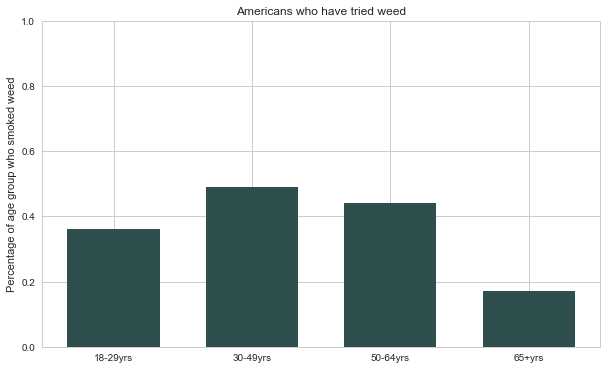

In [5]:
## code partly from lab solutions
data = [.36,.49,.44,.17]
label = ["18-29yrs","30-49yrs","50-64yrs","65+yrs"]
width = 1/1.5

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Americans who have tried weed")
axes.bar(range(0, len(data)), data, width, color=THEME, align="center")
axes.set_xticks(range(0, len(data)))
axes.set_xticklabels(label)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 1))
axes.set_ylabel( "Percentage of age group who smoked weed")

plt.show()

This representation is better because it lets us see the percentage by age. It really seems that there's a bias against weed in the 65+ age range, and slightly in the 50-64 years. The increase from 30-49 years from the younger age range is what I would expect to see if the age groups did not perform differently, as the longer you are alive the more chance you have to smoke marijuana.

**Part 2.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart (what visualization principles does it violate)?
2. Present an alternative(s). Make whatever assumptions you need to make but explain them.

In [6]:
Image(url="http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg")

The first issue that I see here is that there is a -1%, which doesn't make any sense in a pie chart. Upon summing the percentages, it seems to add up to .99. This makes me think that the -1% was introduced just to show that it exists and isn't actually real data. This means that probably no one lived about 89 in this community during this time. However, I cannot change the data based on that assumption, so I will keep it as it is.

That, or somehow people are getting reincarnated at 90-99. 

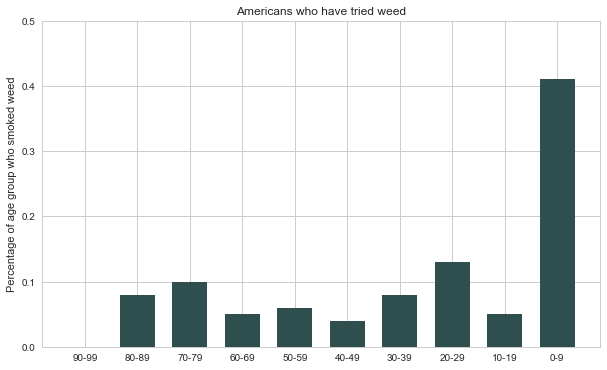

In [7]:
data = [-.01,.08,.1,.05,.06,.04,.08,.13,.05,.41]
label = ["90-99","80-89","70-79","60-69","50-59","40-49","30-39","20-29","10-19","0-9"]
width = 1/1.5

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Americans who have tried weed")
axes.bar(range(0, len(data)), data, width, color=THEME, align="center")
axes.set_xticks(range(0, len(data)))
axes.set_xticklabels(label)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, .5))
axes.set_ylabel( "Percentage of age group who smoked weed")

plt.show()

We can see in this chart that the largest risk of dying comes when you are young. However, once you become a teenager, your odds of surviving become much better. Presumably, the spike at 20-29 is because of the risk of Indian attacks, or some other sort of conflict. Then you're much more likely to survive until 70-79, where I presume people died off naturally. 

## Question 2 - Obtaining and Querying Data

In Lab 4, we obtained data from a Wikipedia page. This time we're going to start with a Wikipedia page but obtain and transform the supporting data.

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. If you follow footnote 6, you can obtain the raw data for FY2015 which is an Excel file. The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs cover departments and sub-departments. **We are only interested in departments** which means we don't want spending from the first tab (although you may want the contractor information) and we don't want sub-departments. A department will have a code that ends with "00". For example, "9700" is the Defense Department but "9761" is "Defense Threat Reduction". We're not interested in the latter.
3. Create a SQLite3 database, `contracts.db`, of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first, `contractors`, should have an id (as a primary key) and a global_vendor_name (as a varchar). The second, `actions`, should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. Follow the same pattern as in the Lab. All your database and table creation (DDL) commands will be in `contracts.sql`.
4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2016 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required). Place this "ETL" code in a separate `contracts.py` file and include it with your submission.
5. After generating the database, connect to it and answer the 3 questions:

**Questions**

1. What are the total actions and dollars obligated by department?
2. What is Johns Hopkins University's number of actions and dollars by department?
3. How many vendors received contracts from 1 department, 2 departments, etc? In other words, I want a table that looks like the following (numbers are absolutely made up):

| # Departments | Vendors |
|-------------|-----------|
| 1           | 1238      |
| 2           | 525       |
| 3           | 275       |
| ...         |           |
| n           | 2         |

Interpret the first two rows in words. What is the overall story? Now, using *percentages* (instead of these raw counts), make a chart that shows this story using the principles explored in class.

In [9]:
conn = sqlite3.connect('contracts.db')
cursor = conn.cursor()
query = '''
    SELECT a.department, sum("Number of Actions"),sum("Dollars Obligated")
              FROM actions a
    GROUP BY
        a.department
          '''

cursor.execute(query)
part1 = pd.DataFrame(cursor.fetchall(),columns = ['Department','Actions','Dollars'])
part1

,Department,Actions,Dollars
0,(GSA) 4700,47825,"$5,961,147,392.33"
1,Agriculture (1200),9621,"$3,652,093,712.66"
2,Air Force (5700),42409,"$42,187,753,810.21"
3,Army (2100),43827,"$44,910,442,468.26"
4,Commerce (1300),5857,"$2,115,698,218.77"
5,DoD (9700),7139909,"$175,185,649,682.56"
6,EPA (6800),9115,"$1,128,402,445.47"
7,Education (9100),1844,"$2,567,375,881.19"
8,Energy (8900),4335,"$23,947,016,200.56"
9,Health & Human Services (7500),14107,"$14,948,088,333.90"


In [10]:
cursor = conn.cursor()
query = '''
    SELECT b.global_vendor_name, a.department, sum("Number of Actions"),sum("Dollars Obligated")
              FROM actions a
              LEFT JOIN contractors b 
                  on a.vendor_code = b.id
    WHERE b.global_vendor_name = 'JOHNS HOPKINS UNIVERSITY'
    GROUP BY 1,2
          '''

cursor.execute(query)
part2 = pd.DataFrame(cursor.fetchall(),columns = ['global_vendor_name','Department','Actions','Dollars'])
part2

,global_vendor_name,Department,Actions,Dollars
0,JOHNS HOPKINS UNIVERSITY,DoD (9700),1536,"$761,023,695.47"
1,JOHNS HOPKINS UNIVERSITY,Health & Human Services (7500),238,"$38,968,009.98"
2,JOHNS HOPKINS UNIVERSITY,NASA (8000),425,"$214,047,526.39"
3,JOHNS HOPKINS UNIVERSITY,Navy (1700),959,"$549,499,826.59"


In [11]:
cursor = conn.cursor()
query = '''
    SELECT
        count as num_departments
        ,count(*) as Vendors
    FROM
    (
        SELECT 
            global_vendor_name
            ,count(*) as count
        FROM
            (SELECT distinct b.global_vendor_name, a.department
              FROM actions a
              LEFT JOIN contractors b 
                  on a.vendor_code = b.id
            )
          GROUP BY  
          global_vendor_name
    )
    Group by count
          '''

cursor.execute(query)
part3 = pd.DataFrame(cursor.fetchall(),columns = ['# Departments','Vendors'])
part3

,# Departments,Vendors
0,1,1122
1,2,121
2,3,43
3,4,26
4,5,13
5,6,11
6,7,8
7,8,9
8,9,2
9,10,4


Based on this chart, it seems that the majority of vendors served only one or two departments. Very rarely will a vendor serve more than 2.

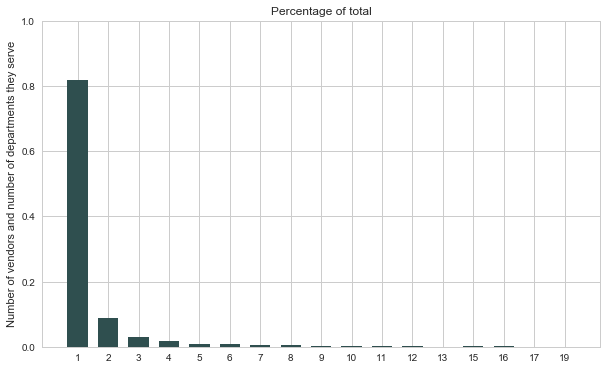

In [12]:
data = part3['Vendors']
label = part3['# Departments']
width = 1/1.5

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Percentage of total")
axes.bar(range(0, len(data)), data/sum(data), width, color=THEME, align="center")
axes.set_xticks(range(0, len(data)))
axes.set_xticklabels(label)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 1))
axes.set_ylabel( "Number of vendors and number of departments they serve")

plt.show()